# This Project reflects the work of "Using Apple Store Dataset to Predict User Rating of Mobile Applications"
https://www.researchgate.net/publication/335383461_Using_Apple_Store_Dataset_to_Predict_User_Rating_of_Mobile_Applications


by Kevin Daimi and Noha Hazzazi


Python implementaion by Mirza Shaheen Iqubal

In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.pyplot:DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [340]:
ap= pd.read_csv('AppleStore.csv',index_col=False )

In [341]:
ap.head(10)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
6,7,283646709,PayPal - Send and request money safely,227795968,USD,0.00,119487,879,4.0,4.5,6.12.0,4+,Finance,37,0,19,1
7,8,284035177,Pandora - Music & Radio,130242560,USD,0.00,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1


In [342]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 956.0+ KB


In [347]:
ap.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7197.0,8.631310e+08,2.712368e+08,281656475.0,600093661.0,978148241.0,1.082310e+09,1.188376e+09
size_bytes,7197.0,1.991345e+08,3.592069e+08,589824.0,46922752.0,97153024.0,1.819249e+08,4.025970e+09
price,7197.0,1.726218e+00,5.833006e+00,0.0,0.0,0.0,1.990000e+00,2.999900e+02
rating_count_tot,7197.0,1.289291e+04,7.573941e+04,0.0,28.0,300.0,2.793000e+03,2.974676e+06
rating_count_ver,7197.0,4.603739e+02,3.920455e+03,0.0,1.0,23.0,1.400000e+02,1.770500e+05
user_rating,7197.0,3.526956e+00,1.517948e+00,0.0,3.5,4.0,4.500000e+00,5.000000e+00
user_rating_ver,7197.0,3.253578e+00,1.809363e+00,0.0,2.5,4.0,4.500000e+00,5.000000e+00
sup_devices.num,7197.0,3.736182e+01,3.737715e+00,9.0,37.0,37.0,3.800000e+01,4.700000e+01
ipadSc_urls.num,7197.0,3.707100e+00,1.986005e+00,0.0,3.0,5.0,5.000000e+00,5.000000e+00
lang.num,7197.0,5.434903e+00,7.919593e+00,0.0,1.0,1.0,8.000000e+00,7.500000e+01


In [ ]:
ap.drop(['id', 'track_name', 'size_bytes', 'currency', 'price',
         'ver', 'cont_rating', 'prime_genre','vpp_lic'],axis = 1, inplace= True)

In [346]:
ap.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [236]:
ap.drop('Unnamed: 0',axis=1, inplace =True)

In [237]:
ap.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 7 columns):
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
dtypes: float64(2), int64(5)
memory usage: 449.8 KB


In [334]:
#Feature Selection
import sklearn
sklearn.feature_selection.mutual_info_regression(X, y, discrete_features='auto',
                                                 n_neighbors=3, copy=True, random_state=None)
#eleminate lowest features 0.03

array([0.47306004, 0.31996154, 0.59293071, 0.03936043, 0.07357471])

In [263]:
ap.head()
ap_new = ap

,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num
0,21292,26,4.0,4.5,38,5,10
1,161065,26,4.0,3.5,37,5,23
2,188583,2822,3.5,4.5,37,5,3
3,262241,649,4.0,4.5,37,5,9
4,985920,5320,4.5,5.0,37,5,45


In [333]:
ap_new.head()

,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ipadSc_urls.num,lang.num
0,21292,26,4.0,4.5,5,10
1,161065,26,4.0,3.5,5,23
2,188583,2822,3.5,4.5,5,3
3,262241,649,4.0,4.5,5,9
4,985920,5320,4.5,5.0,5,45


In [ ]:
#Train ap_new after feature selection

In [294]:
from sklearn.model_selection import train_test_split

In [295]:
X = ap_new.drop('user_rating',axis =1)
y = ap_new['user_rating']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34)

In [15]:
y_test

3511    4.5
1100    4.5
1966    4.0
3353    4.5
3878    0.0
       ... 
157     4.0
2992    0.0
5634    0.0
1584    4.0
428     4.0
Name: user_rating, Length: 2447, dtype: float64

In [16]:
unsn = ap.sample(10)
unsn_x = unsn.drop('user_rating',axis =1)
unsn_y = unsn['user_rating']

In [297]:
from sklearn.linear_model import LinearRegression

# Linear Regression

In [298]:
lnrg = LinearRegression()

In [299]:
lnrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [300]:
lmprediction = lnrg.predict(X_test)

In [302]:
from scipy.stats import pearsonr
lmcorr, _ = pearsonr(lmprediction, y_test)


In [303]:
from sklearn.metrics import mean_absolute_error
lmmae=mean_absolute_error(y_test, lmprediction).round(3)

In [304]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [305]:
lmmsqe=mean_squared_error(y_test, lmprediction)

In [306]:
lmrms = sqrt(mean_squared_error(y_test, lmprediction))

In [307]:
print('Linear Regression')
print('Coeefficient Correlation: %.3f'%lmcorr)
print('Mean Absolute Error: %.3f'%lmmae)
print('Mean Squre Root Error: %.3f'%lmmsqe)
print('Root Mean Squre Error: %.3f'%lmrms)

Linear Regression
Coeefficient Correlation: 0.785
Mean Absolute Error: 0.640
Mean Squre Root Error: 0.912
Root Mean Squre Error: 0.955


# SVM

In [308]:
from sklearn.svm import SVR

In [309]:
svc_mdl = SVR()
svc_mdl.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [310]:
predsvm = svc_mdl.predict(X_test)

In [312]:
svmcorr, _ = pearsonr(predsvm, y_test)
print('Pearsons correlation: %.3f' % svmcorr)

Pearsons correlation: 0.915


In [313]:
svmcorr, _ = pearsonr(predsvm, y_test)
svmmae=mean_absolute_error(y_test, predsvm).round(3)
svmmsqe=mean_squared_error(y_test, predsvm)
svmrms = sqrt(mean_squared_error(y_test, predsvm))

In [314]:
print('SVM')
print('Coeefficient Correlation: %.3f'%svmcorr)
print('Mean Absolute Error: %.3f'%svmmae)
print('Mean Squre Root Error: %.3f'%svmmsqe)
print('Root Mean Squre Error: %.3f'%svmrms)

SVM
Coeefficient Correlation: 0.915
Mean Absolute Error: 0.432
Mean Squre Root Error: 0.385
Root Mean Squre Error: 0.620


# Random Forest

In [315]:
from sklearn.ensemble import RandomForestRegressor

In [316]:
rfc = RandomForestRegressor(n_estimators=600)

In [317]:
rfc.fit(X_train,y_train)
predrf = rfc.predict(X_test)

In [331]:
rfcorr, _ = pearsonr(predrf, y_test)
rfmae=mean_absolute_error(y_test, predrf).round(3)
rfmsqe=mean_squared_error(y_test, predrf)
rfrms = sqrt(mean_squared_error(y_test, predrf))
print('Coeefficient Correlation: %.3f'%rfcorr)
print('Mean Absolute Error: %.3f'%rfmae)
print('Mean Squre Root Error: %.3f'%rfmsqe)
print('Root Mean Squre Error: %.3f'%rfrms)

Coeefficient Correlation: 0.951
Mean Absolute Error: 0.298
Mean Squre Root Error: 0.228
Root Mean Squre Error: 0.477


# Decision Tree


In [319]:
from sklearn.tree import DecisionTreeRegressor

In [320]:
dtr = DecisionTreeRegressor()

In [321]:
dtr.fit(X_train,y_train)
predtr = dtr.predict(X_test)

In [322]:
dtrcorr, _ = pearsonr(predtr, y_test)
dtrmae=mean_absolute_error(y_test, predtr).round(3)
dtrmsqe=mean_squared_error(y_test, predtr)
dtrrms = sqrt(mean_squared_error(y_test, predtr))
print('Decision Tree')
print('Coeefficient Correlation: %.3f'%dtrcorr)
print('Mean Absolute Error: %.3f'%dtrmae)
print('Mean Squre Root Error: %.3f'%dtrmsqe)
print('Root Mean Squre Error: %.3f'%dtrrms)

Decision Tree
Coeefficient Correlation: 0.914
Mean Absolute Error: 0.372
Mean Squre Root Error: 0.413
Root Mean Squre Error: 0.642


# ANN

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [120]:
X = ap_new.drop('user_rating',axis =1).values
y = ap_new['user_rating'].values
X = X.astype(float)
y = y.astype(float)

In [121]:

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.34)

In [197]:
model = Sequential([
    Dense(units=1,kernel_initializer='RandomNormal'),
    Dense(units=1,kernel_initializer='RandomNormal'),
    Dense(units=1,kernel_initializer='RandomNormal')
])

In [198]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

In [199]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [215]:
model.fit(X_train,y_train,epochs=500)

Epoch 1/500
4606/4606 [==============================] - 0s 38us/sample - loss: 3.9170
Epoch 2/500
4606/4606 [==============================] - 0s 41us/sample - loss: 1.1855
Epoch 3/500
4606/4606 [==============================] - 0s 37us/sample - loss: 0.9653
Epoch 4/500
4606/4606 [==============================] - 0s 36us/sample - loss: 0.9279
Epoch 5/500
4606/4606 [==============================] - 0s 36us/sample - loss: 0.9198
Epoch 6/500
4606/4606 [==============================] - 0s 37us/sample - loss: 0.9146
Epoch 7/500
4606/4606 [==============================] - 0s 39us/sample - loss: 0.9105
Epoch 8/500
4606/4606 [==============================] - 0s 58us/sample - loss: 0.9082
Epoch 9/500
4606/4606 [==============================] - 0s 46us/sample - loss: 0.9073
Epoch 10/500
4606/4606 [==============================] - 0s 37us/sample - loss: 0.9039
Epoch 11/500
4606/4606 [==============================] - 0s 39us/sample - loss: 0.9040
Epoch 12/500
4606/4606 [=================

4606/4606 [==============================] - 0s 29us/sample - loss: 0.8650
Epoch 187/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8642
Epoch 188/500
4606/4606 [==============================] - 0s 31us/sample - loss: 0.8636
Epoch 189/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8641
Epoch 190/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8617
Epoch 191/500
4606/4606 [==============================] - 0s 31us/sample - loss: 0.8616
Epoch 192/500
4606/4606 [==============================] - 0s 30us/sample - loss: 0.8638
Epoch 193/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8631
Epoch 194/500
4606/4606 [==============================] - 0s 30us/sample - loss: 0.8642
Epoch 195/500
4606/4606 [==============================] - 0s 31us/sample - loss: 0.8646
Epoch 196/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8608
Epoch 197/500
4606/4606 [==========

4606/4606 [==============================] - 0s 29us/sample - loss: 0.8549
Epoch 279/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8546
Epoch 280/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8523
Epoch 281/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8558
Epoch 282/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8535
Epoch 283/500
4606/4606 [==============================] - 0s 30us/sample - loss: 0.8532
Epoch 284/500
4606/4606 [==============================] - 0s 30us/sample - loss: 0.8516
Epoch 285/500
4606/4606 [==============================] - 0s 30us/sample - loss: 0.8523
Epoch 286/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8518
Epoch 287/500
4606/4606 [==============================] - 0s 30us/sample - loss: 0.8543
Epoch 288/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8526
Epoch 289/500
4606/4606 [==========

4606/4606 [==============================] - 0s 32us/sample - loss: 0.8390
Epoch 462/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8386
Epoch 463/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8347
Epoch 464/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8412
Epoch 465/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8416
Epoch 466/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8348
Epoch 467/500
4606/4606 [==============================] - 0s 33us/sample - loss: 0.83950s - loss: 0.834
Epoch 468/500
4606/4606 [==============================] - 0s 31us/sample - loss: 0.8421
Epoch 469/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8383
Epoch 470/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8360
Epoch 471/500
4606/4606 [==============================] - 0s 29us/sample - loss: 0.8371
Epoch 472/500
4606/

In [216]:
predtf = model.predict(X_test)


In [217]:
from itertools import chain
predtf = list(chain(*predtf))
predtf = np.array(predtf)


In [218]:
predtf

array([4.44716  , 2.9842706, 3.3155222, ..., 4.3892035, 4.4692698,
       4.3855133], dtype=float32)

In [219]:
tfmae=mean_absolute_error(y_test, predtf).round(3)
tfmsqe=mean_squared_error(y_test, predtf)
tfrms = sqrt(mean_squared_error(y_test, predtf))
tfcorr, _ = pearsonr(predtf, y_test)

In [220]:
print('ANN')
print('Pearsons correlation: %.3f' % tfcorr)
print('Mean Absolute Error: %.3f'%tfmae)
print('Mean Squre Root Error: %.3f'%tfmsqe)
print('Root Mean Squre Error: %.3f'%tfrms)


ANN
Pearsons correlation: 0.789
Mean Absolute Error: 0.583
Mean Squre Root Error: 0.859
Root Mean Squre Error: 0.927


# Result

Text(0.5, 1.0, 'Correlation Coefficient ')

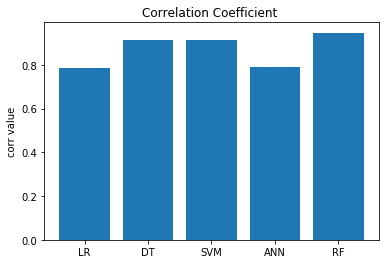

In [326]:
corrobjects = ('LR', 'DT', 'SVM', 'ANN','RF')
y_pos = np.arange(len(corrobjects))
corrperformance = [lmcorr,dtrcorr,svmcorr,tfcorr,rfcorr]
plt.bar(y_pos, corrperformance, align='center',)
plt.xticks(y_pos, corrobjects)
plt.ylabel('corr value')
plt.title('Correlation Coefficient ')

Text(0.5, 1.0, 'Mean Abs Error ')

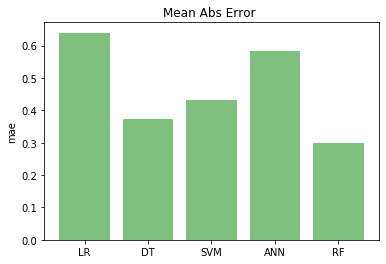

In [336]:
maeobjects = ('LR', 'DT', 'SVM', 'ANN','RF')
y_pos = np.arange(len(maeobjects))
maeperformance = [lmmae,dtrmae,svmmae,tfmae,rfmae]
plt.bar(y_pos, maeperformance, align='center',color = 'green', alpha=0.5)
plt.xticks(y_pos, maeobjects)
plt.ylabel('mae')
plt.title('Mean Abs Error ')

Text(0.5, 1.0, 'Mean sqrt Error ')

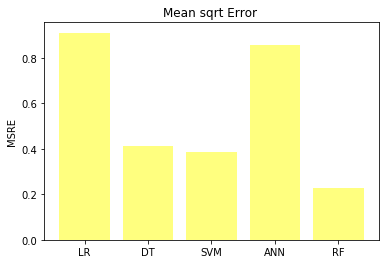

In [337]:
msqrtobjects = ('LR', 'DT', 'SVM', 'ANN','RF')
y_pos = np.arange(len(msqrtobjects))
msqrtperformance = [lmmsqe,dtrmsqe,svmmsqe,tfmsqe,rfmsqe]
plt.bar(y_pos, msqrtperformance, align='center',color = 'yellow', alpha=0.5)
plt.xticks(y_pos, msqrtobjects)
plt.ylabel('MSRE')
plt.title('Mean sqrt Error ')

Text(0.5, 1.0, 'Root Mean sqrt Error ')

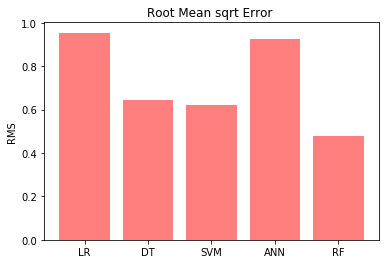

In [335]:
rmsqrtobjects = ('LR', 'DT', 'SVM', 'ANN','RF')
y_pos = np.arange(len(rmsqrtobjects))
rmsqrtperformance = [lmrms,dtrrms,svmrms,tfrms,rfrms]
plt.bar(y_pos, rmsqrtperformance, align='center',color = 'red', alpha=0.5)
plt.xticks(y_pos, rmsqrtobjects)
plt.ylabel('RMS')
plt.title('Root Mean sqrt Error ')

# Random Forest gives the best result with highest Correlation Coefficient and less errors

After using feature selection runtime reduced and performance increased .
